# 📊 Predicción de Abandono de Clientes (Churn)
Este proyecto entrena una red neuronal simple para predecir si un cliente abandonará un servicio.

### Objetivos:
- Cargar y preparar un dataset tabular
- Entrenar una red neuronal con Keras
- Visualizar curvas de entrenamiento
- Evaluar el modelo con métricas comunes
- Aplicar buenas prácticas de ingeniería de proyectos

In [1]:
# 📦 1. Importar librerías principales
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# 📁 2. Cargar y explorar el dataset
df = pd.read_csv('../data/churn_dataset.csv')
df.head()

,compras,llamadas_soporte,dias_inactivo,tiempo_suscrito,churn
0,4,0,27,1,1
1,1,2,25,13,1
2,3,1,18,6,1
3,3,2,23,17,1
4,2,3,18,12,1


In [3]:
# 🔍 3. Separar variables predictoras y variable objetivo
X = df.drop("churn", axis=1)
y = df["churn"]

In [4]:
# 🧼 4. Escalar los datos y dividir en train/test
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [9]:
# 🧠 5. Cargar configuración y modelo
import sys, os, yaml
sys.path.append(os.path.abspath("../src"))

from model import build_model
from utils import plot_metrics, show_confusion_matrix

with open("../src/config2.yaml") as f:
    config = yaml.safe_load(f)

model = build_model(config)

In [10]:
# 🚂 6. Entrenar el modelo
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=config['training']['epochs'],
                    batch_size=config['training']['batch_size'])

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7743 - loss: 0.6289 - val_accuracy: 0.8687 - val_loss: 0.4229
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8496 - loss: 0.4089 - val_accuracy: 0.8875 - val_loss: 0.2847
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8730 - loss: 0.3005 - val_accuracy: 0.8875 - val_loss: 0.2656
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8524 - loss: 0.3201 - val_accuracy: 0.8875 - val_loss: 0.2536
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8585 - loss: 0.3211 - val_accuracy: 0.8875 - val_loss: 0.2563
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8370 - loss: 0.3525 - val_accuracy: 0.8813 - val_loss: 0.2671
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8543 - loss: 0.3131 - val_accuracy: 0.8813 - val_loss: 0.2576
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8724 - loss: 0.2835 - val_accuracy: 0.8813 - 

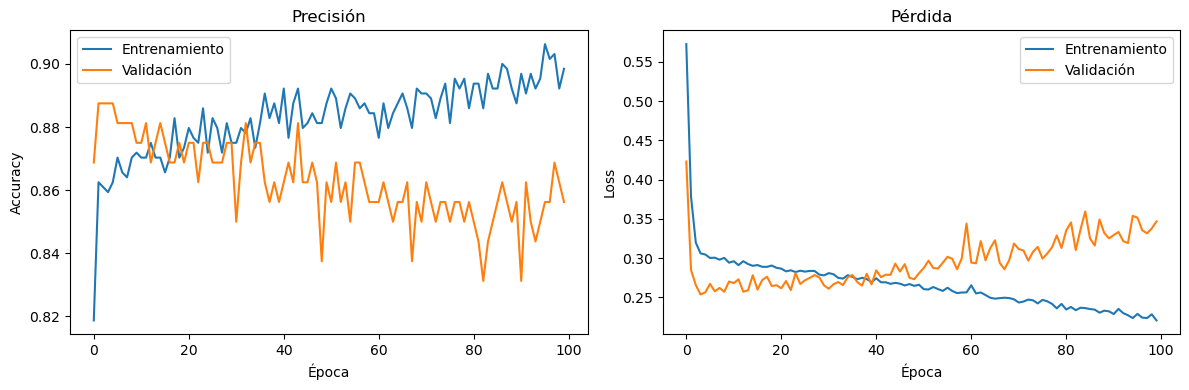

In [11]:
# 📉 7. Visualizar métricas de entrenamiento
plot_metrics(history)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


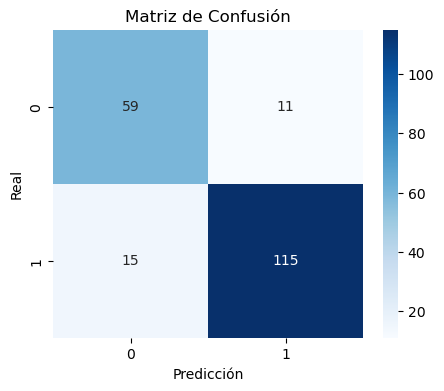

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        70
           1       0.91      0.88      0.90       130

    accuracy                           0.87       200
   macro avg       0.85      0.86      0.86       200
weighted avg       0.87      0.87      0.87       200



In [12]:
# 🧪 8. Evaluar el modelo en test
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

show_confusion_matrix(y_test, y_pred_classes)